##Setup

You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**.

In [11]:
#@title mount your Google Drive
#@markdown Your work will be stored in a folder called `cs285_f2021` by default to prevent Colab instance timeouts from deleting your edits.

import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#@title set up mount symlink

DRIVE_PATH = '/content/gdrive/My\ Drive/cs285_f2021'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/cs285_f2021'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

In [3]:
#@title apt install requirements

#@markdown Run each section with Shift+Enter

#@markdown Double-click on section headers to show code.

!apt update 
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg > /dev/null 2>&1

!pip install opencv-python==3.4.0.12

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [85.2 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  

In [ ]:
#@title download mujoco

MJC_PATH = '{}/mujoco'.format(SYM_PATH)
if not os.path.exists(MJC_PATH):
  %mkdir $MJC_PATH
%cd $MJC_PATH
if not os.path.exists(os.path.join(MJC_PATH, 'mujoco200')):
  !wget -q https://www.roboti.us/download/mujoco200_linux.zip
  !unzip -q mujoco200_linux.zip
  %mv mujoco200_linux mujoco200
  %rm mujoco200_linux.zip

/content/gdrive/My Drive/cs285_f2021/mujoco


In [ ]:
#@title update mujoco paths

import os

os.environ['LD_LIBRARY_PATH'] += ':{}/mujoco200/bin'.format(MJC_PATH)
os.environ['MUJOCO_PY_MUJOCO_PATH'] = '{}/mujoco200'.format(MJC_PATH)
os.environ['MUJOCO_PY_MJKEY_PATH'] = '{}/mjkey.txt'.format(MJC_PATH)

## installation on colab does not find *.so files
## in LD_LIBRARY_PATH, copy over manually instead
!cp $MJC_PATH/mujoco200/bin/*.so /usr/lib/x86_64-linux-gnu/

Ensure your `mjkey.txt` is in /content/cs285_f2021/mujoco before this step

In [ ]:
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/lib/nvidia

In [ ]:
#@title clone and install mujoco-py

%cd $MJC_PATH
if not os.path.exists('mujoco-py'):
  !git clone https://github.com/openai/mujoco-py.git
%cd mujoco-py
%pip install -e .

## cythonize at the first import
# import mujoco_py

/content/gdrive/My Drive/cs285_f2021/mujoco
/content/gdrive/My Drive/cs285_f2021/mujoco/mujoco-py
Obtaining file:///content/gdrive/My%20Drive/cs285_f2021/mujoco/mujoco-py
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Attempting uninstall: mujoco-py
    Found existing installation: mujoco-py 0.5.7
    Uninstalling mujoco-py-0.5.7:
      Successfully uninstalled mujoco-py-0.5.7
  Running setup.py develop for mujoco-py


In [4]:
#@title clone homework repo
#@markdown Note that this is the same codebase from homework 1,
#@markdown so you may need to move your old `homework_fall2021`
#@markdown folder in order to clone the repo again.

#@markdown **Don't delete your old work though!**
#@markdown You will need it for this assignment.

%cd $SYM_PATH
!git clone https://github.com/berkeleydeeprlcourse/homework_fall2021.git
%cd homework_fall2021/hw4
%pip install -r requirements_colab.txt -f https://download.pytorch.org/whl/torch_stable.html
%pip install -e .

/content/gdrive/My Drive/cs285_f2021
fatal: destination path 'homework_fall2021' already exists and is not an empty directory.
/content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 1.6 MB 32.8 MB/s 
     |████████████████████████████████| 6.8 MB 60.0 MB/s 
     |████████████████████████████████| 216 kB 73.9 MB/s 
     |████████████████████████████████| 12.6 MB 60.2 MB/s 
     |████████████████████████████████| 750 kB 62.6 MB/s 
     |████████████████████████████████| 398 kB 76.5 MB/s 
ERROR: Operation cancelled by user
Obtaining file:///content/gdrive/My%20Drive/cs285_f2021/homework_fall2021/hw4
  Running setup.py develop for cs285


In [ ]:
#@title set up virtual display

from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

# For later
from cs285.infrastructure.colab_utils import (
    wrap_env,
    show_video
)

In [ ]:
#@title test virtual display

#@markdown If you see a video of a four-legged ant fumbling about, setup is complete!

import gym
import matplotlib
matplotlib.use('Agg')

env = wrap_env(gym.make("Ant-v2"))

observation = env.reset()
for i in range(10):
    env.render(mode='rgb_array')
    obs, rew, term, _ = env.step(env.action_space.sample() ) 
    if term:
      break;
            
env.close()
print('Loading video...')
show_video()

## Editing Code

To edit code, click the folder icon on the left menu. Navigate to the corresponding file (`cs285_f2021/...`). Double click a file to open an editor. There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window). We sync your edits to Google Drive so that you won't lose your work in the event of an instance timeout, but you will need to re-mount your Google Drive and re-install packages with every new instance.

## Run MBRL

In [ ]:
#@title imports
import os
import time

from cs285.infrastructure.rl_trainer import RL_Trainer
from cs285.agents.mb_agent import MBAgent

%load_ext autoreload
%autoreload 2

In [ ]:
#@title runtime arguments

class Args:

  def __getitem__(self, key):
    return getattr(self, key)

  def __setitem__(self, key, val):
    setattr(self, key, val)

  def __contains__(self, key):
    return hasattr(self, key)

  env_name = "cheetah-cs285-v0" #@param ["cheetah-cs285-v0", "obstacles-cs285-v0", "reacher-cs285-v0"]
  exp_name = "TODO"#@param
  n_iter = 20 #@param {type:"integer"}

  if env_name == 'reacher-cs285-v0':
    ep_len = 200
  if env_name == 'cheetah-cs285-v0':
    ep_len = 500
  if env_name == 'obstacles-cs285-v0':
    ep_len = 100

  #@markdown batches and steps
  batch_size = 8000 #@param {type: "integer"}
  eval_batch_size = 400 #@param {type: "integer"}
  train_batch_size = 512 #@param {type: "integer"}
  batch_size_initial = 20000 #@param {type: "integer"}

  num_agent_train_steps_per_iter = 1000 #@param {type: "integer"}

  #@markdown MBRL parameters
  ensemble_size = 3 #@param {type:"integer"}
  mpc_horizon = 10 #@param {type:"integer"}
  mpc_num_action_sequences = 1000 #@param {type:"integer"}
  mpc_action_sampling_strategy = 'random' #@param ["random", "cem"]
  cem_iterations = 4 #@param {type: "integer"}
  cem_num_elites = 5 #@param {type: "integer"}
  cem_alpha = 1.0 #@param {type: "raw"}

  #@markdown Learning parameters
  learning_rate = 0.001 #@param {type:"raw"}
  n_layers = 2 #@param {type:"integer"}
  size = 250 #@param {type:"integer"}
  add_sl_noise = True #@param {type:"boolean"}

  #@markdown system
  save_params = False #@param {type: "boolean"}
  no_gpu = False #@param {type: "boolean"}
  which_gpu = 0 #@param {type: "integer"}
  seed = 1 #@param {type: "integer"}

  #@markdown logging
  ## default is to not log video so
  ## that logs are small enough to be
  ## uploaded to gradscope
  video_log_freq = -1 #@param {type: "integer"}
  scalar_log_freq = 1#@param {type: "integer"}


args = Args()

## ensure compatibility with hw1 code
args['train_batch_size'] = args['batch_size']

if args['video_log_freq'] > 0:
  import warnings
  warnings.warn(
      '''\nLogging videos will make eventfiles too'''
      '''\nlarge for the autograder. Set video_log_freq = -1'''
      '''\nfor the runs you intend to submit.''')

In [ ]:
#@title create directories for logging

data_path = '''/content/cs285_f2021/''' \
        '''homework_fall2021/hw4/data'''

if not (os.path.exists(data_path)):
    os.makedirs(data_path)

logdir = 'hw4_' + args.exp_name + '_' + args.env_name + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join(data_path, logdir)
args['logdir'] = logdir
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

print("LOGGING TO: ", logdir)


In [ ]:
#@title Define Model Based trainer

class MB_Trainer(object):

    def __init__(self, params):

        computation_graph_args = {
            'ensemble_size': params['ensemble_size'],
            'n_layers': params['n_layers'],
            'size': params['size'],
            'learning_rate': params['learning_rate'],
            }

        train_args = {
            'num_agent_train_steps_per_iter': params['num_agent_train_steps_per_iter'],
        }

        controller_args = {
            'mpc_horizon': params['mpc_horizon'],
            'mpc_num_action_sequences': params['mpc_num_action_sequences'],
            'mpc_action_sampling_strategy': params['mpc_action_sampling_strategy'],
            'cem_iterations': params['cem_iterations'],
            'cem_num_elites': params['cem_num_elites'],
            'cem_alpha': params['cem_alpha'],
        }

        agent_params = {**computation_graph_args, **train_args, **controller_args}

        self.params = params
        self.params['agent_class'] = MBAgent
        self.params['agent_params'] = agent_params

        self.rl_trainer = RL_Trainer(self.params)

    def run_training_loop(self):

        self.rl_trainer.run_training_loop(
            self.params['n_iter'],
            collect_policy = self.rl_trainer.agent.actor,
            eval_policy = self.rl_trainer.agent.actor,
            )


In [ ]:
#@title run training

trainer = MB_Trainer(args)
trainer.run_training_loop()

In [ ]:
#@markdown You can visualize your runs with tensorboard from within the notebook

## requires tensorflow==2.3.0
%load_ext tensorboard
%tensorboard --logdir /content/cs285_f2021/homework_fall2021/hw4/data/

In [ ]:
#Include this at the top of your colab code
import os
if not os.path.exists('.mujoco_setup_complete'):
  # Get the prereqs
  !apt-get -qq update
  !apt-get -qq install -y libosmesa6-dev libgl1-mesa-glx libglfw3 libgl1-mesa-dev libglew-dev patchelf
  # Get Mujoco
  !mkdir ~/.mujoco
  !wget -q https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz -O mujoco.tar.gz
  !tar -zxf mujoco.tar.gz -C "$HOME/.mujoco"
  !rm mujoco.tar.gz
  # Add it to the actively loaded path and the bashrc path (these only do so much)
  !echo 'export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$HOME/.mujoco/mujoco210/bin' >> ~/.bashrc 
  !echo 'export LD_PRELOAD=$LD_PRELOAD:/usr/lib/x86_64-linux-gnu/libGLEW.so' >> ~/.bashrc 
  # THE ANNOYING ONE, FORCE IT INTO LDCONFIG SO WE ACTUALLY GET ACCESS TO IT THIS SESSION
  !echo "/root/.mujoco/mujoco210/bin" > /etc/ld.so.conf.d/mujoco_ld_lib_path.conf
  !ldconfig
  # Install Mujoco-py
  !pip3 install -U 'mujoco-py<2.2,>=2.1'
  # run once
  !touch .mujoco_setup_complete

try:
  if _mujoco_run_once:
    pass
except NameError:
  _mujoco_run_once = False
if not _mujoco_run_once:
  # Add it to the actively loaded path and the bashrc path (these only do so much)
  try:
    os.environ['LD_LIBRARY_PATH']=os.environ['LD_LIBRARY_PATH'] + ':/root/.mujoco/mujoco210/bin'
  except KeyError:
    os.environ['LD_LIBRARY_PATH']='/root/.mujoco/mujoco210/bin'
  try:
    os.environ['LD_PRELOAD']=os.environ['LD_PRELOAD'] + ':/usr/lib/x86_64-linux-gnu/libGLEW.so'
  except KeyError:
    os.environ['LD_PRELOAD']='/usr/lib/x86_64-linux-gnu/libGLEW.so'
  # presetup so we don't see output on first env initialization
  import mujoco_py
  _mujoco_run_once = True

In [3]:
!apt-get install -y \
   libgl1-mesa-dev \
   libgl1-mesa-glx \
   libglew-dev \
   libosmesa6-dev \
   software-properties-common

!apt-get install -y patchelf 

!pip install free-mujoco-py

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-dev is already the newest version (20.0.8-0ubuntu1~18.04.1).
libgl1-mesa-dev set to manually installed.
software-properties-common is already the newest version (0.96.24.32.18).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
Suggested packages:
  glew-utils
The following NEW packages will be installed:
  libgl1-mesa-glx libglew-dev libglew2.0 libosmesa6 libosmesa6-dev
0 upgraded, 5 newly installed, 0 to remove and 42 not upgraded.
Need to get 2,916 kB of archives.
After this operation, 12.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgl1-mesa-glx amd64 20.0.8-0ubuntu1~18.04.1 [5,532 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libglew2.0 amd64 2.0.0-5 [140 kB]
Get:3 http://archive.

In [5]:
!pip install tensorboardX

In [ ]:
!pip install free-mujoco-py==0.5.7

  Using cached mujoco_py-0.5.7-py3-none-any.whl
  Attempting uninstall: mujoco-py
    Found existing installation: mujoco-py 2.1.2.14
    Uninstalling mujoco-py-2.1.2.14:
      Successfully uninstalled mujoco-py-2.1.2.14


In [ ]:
!pip install gym==0.9.1.

  Using cached gym-0.9.1-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.17.2
    Uninstalling gym-0.17.2:
      Successfully uninstalled gym-0.17.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 1.0.5 requires gym>=0.10.5, but you have gym 0.9.1 which is incompatible.


ب)

In [20]:
!python /content/cs285_f2021/homework_fall2021/hw4/run_hw4_mb.py --exp_name q1_cheetah_n500_arch1x32 --env_name cheetah-cs285-v0 --add_sl_noise --n_iter 1 --batch_size_initial 20000 --num_agent_train_steps_per_iter 500 --n_layers 1 --size 32 --scalar_log_freq -1 --video_log_freq -1




LOGGING TO:  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q1_cheetah_n500_arch1x32_cheetah-cs285-v0_15-05-2022_11-43-46 



########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q1_cheetah_n500_arch1x32_cheetah-cs285-v0_15-05-2022_11-43-46
########################
Using GPU id 0
Using action sampling strategy: random


********** Iteration 0 ************


Training agent...

Training agent using sampled data from replay buffer...


In [21]:
!python /content/cs285_f2021/homework_fall2021/hw4/run_hw4_mb.py --exp_name q1_cheetah_n5_arch2x250 --env_name cheetah-cs285-v0 --add_sl_noise --n_iter 1 --batch_size_initial 20000 --num_agent_train_steps_per_iter 5 --n_layers 2 --size 250 --scalar_log_freq -1 --video_log_freq -1




LOGGING TO:  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q1_cheetah_n5_arch2x250_cheetah-cs285-v0_15-05-2022_11-44-50 



########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q1_cheetah_n5_arch2x250_cheetah-cs285-v0_15-05-2022_11-44-50
########################
Using GPU id 0
Using action sampling strategy: random


********** Iteration 0 ************


Training agent...

Training agent using sampled data from replay buffer...


In [22]:
!python /content/cs285_f2021/homework_fall2021/hw4/run_hw4_mb.py --exp_name q1_cheetah_n500_arch2x250 --env_name cheetah-cs285-v0 --add_sl_noise --n_iter 1 --batch_size_initial 20000 --num_agent_train_steps_per_iter 500 --n_layers 2 --size 250 --scalar_log_freq -1 --video_log_freq -1




LOGGING TO:  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q1_cheetah_n500_arch2x250_cheetah-cs285-v0_15-05-2022_11-45-15 



########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q1_cheetah_n500_arch2x250_cheetah-cs285-v0_15-05-2022_11-45-15
########################
Using GPU id 0
Using action sampling strategy: random


********** Iteration 0 ************


Training agent...

Training agent using sampled data from replay buffer...


ج)

In [9]:
!python /content/cs285_f2021/homework_fall2021/hw4/run_hw4_mb.py --exp_name q2_obstacles_singleiteration --env_name obstacles-cs285-v0 --add_sl_noise --num_agent_train_steps_per_iter 20 --n_iter 1 --batch_size_initial 5000 --batch_size 1000 --mpc_horizon 10 --video_log_freq -1




LOGGING TO:  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q2_obstacles_singleiteration_obstacles-cs285-v0_15-05-2022_13-45-21 



########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q2_obstacles_singleiteration_obstacles-cs285-v0_15-05-2022_13-45-21
########################
Using GPU id 0
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
Using action sampling strategy: random


********** Iteration 0 ************


Training agent...

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -45.98809814453125
Eval_StdReturn : 40.870548248291016
Eval_MaxReturn : -11.042766571044922
Eval_MinReturn : -153.24197387695312
Eval_AverageEpLen : 41.4
Train_AverageReturn : -167.09857177734375
Train_StdRetur

Text(0, 0.5, 'Reward')

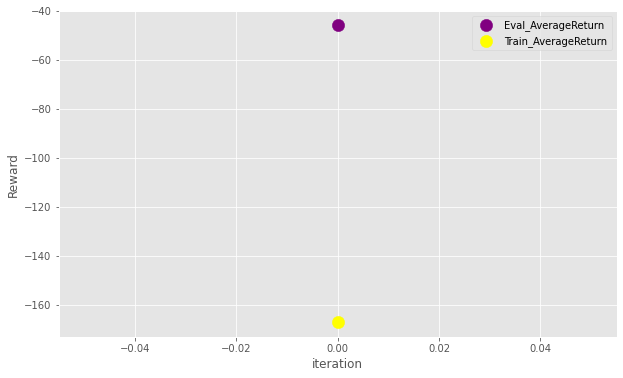

In [63]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10,6)
plt.style.use('ggplot')

fig, ax = plt.subplots()
x = [0,0]
y = [-45.98809814453125,-167.09857177734375]
plt.scatter(x[0],y[0],c='purple',s=150,label='Eval_AverageReturn')
plt.scatter(x[1],y[1],c='yellow',s=150,label='Train_AverageReturn')
ax.legend()
ax.set_xlabel("iteration")
ax.set_ylabel("Reward")

د)

In [15]:
!python /content/cs285_f2021/homework_fall2021/hw4/run_hw4_mb.py --exp_name q3_obstacles --env_name obstacles-cs285-v0 --add_sl_noise --num_agent_train_steps_per_iter 20 --batch_size_initial 5000 --batch_size 1000 --mpc_horizon 10 --n_iter 12 --video_log_freq -1




LOGGING TO:  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q3_obstacles_obstacles-cs285-v0_16-05-2022_05-08-08 



########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q3_obstacles_obstacles-cs285-v0_16-05-2022_05-08-08
########################
Using GPU id 0
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
Using action sampling strategy: random


********** Iteration 0 ************


Training agent...

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -45.98809814453125
Eval_StdReturn : 40.870548248291016
Eval_MaxReturn : -11.042766571044922
Eval_MinReturn : -153.24197387695312
Eval_AverageEpLen : 41.4
Train_AverageReturn : -167.09857177734375
Train_StdReturn : 33.23030471801758
Train_MaxR

Text(0, 0.5, 'Eval_AverageReturn')

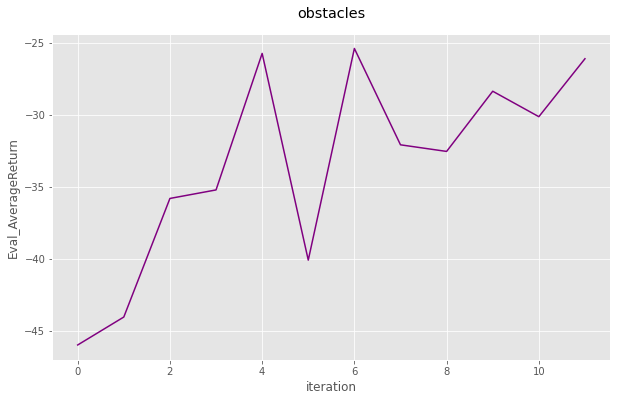

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10,6)
plt.style.use('ggplot')

fig, ax = plt.subplots()
x = np.arange(12)
y = [-45.98809814453125,-44.04443359375,-35.80030822753906,-35.20805740356445,-25.71646499633789,-40.087120056152344,-25.372615814208984,-32.07170867919922,-32.53102111816406,-28.34599494934082,-30.115985870361328,-26.086227416992188]

plt.plot(x,y,color='purple')
plt.title("obstacles",y=1.03)
ax.set_xlabel("iteration")
ax.set_ylabel("Eval_AverageReturn")

In [16]:
!python /content/cs285_f2021/homework_fall2021/hw4/run_hw4_mb.py --exp_name q3_reacher --env_name reacher-cs285-v0 --add_sl_noise --mpc_horizon 10 --num_agent_train_steps_per_iter 1000 --batch_size_initial 5000 --batch_size 5000 --n_iter 15 --video_log_freq -1




LOGGING TO:  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q3_reacher_reacher-cs285-v0_16-05-2022_05-21-04 



########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q3_reacher_reacher-cs285-v0_16-05-2022_05-21-04
########################
Using GPU id 0
Compiling /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr
creating /usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'Eval_AverageReturn')

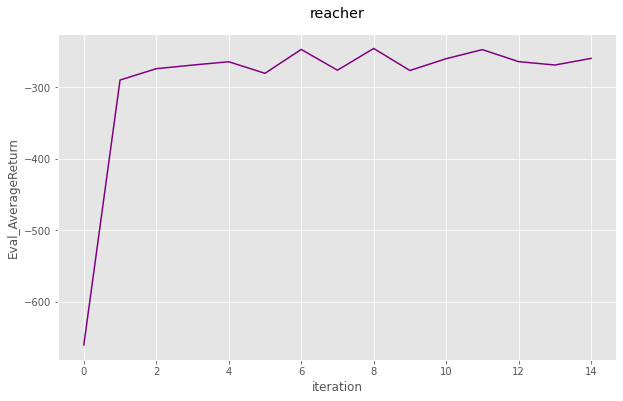

In [26]:
plt.rcParams["figure.figsize"] = (10,6)
plt.style.use('ggplot')

fig, ax = plt.subplots()
x = np.arange(15)
y = [-660.3289184570312, -289.85296630859375,-274.00836181640625,-268.9454345703125,-264.28460693359375,-280.4571533203125
     ,-247.0315704345703,-276.1358642578125,-245.70899963378906,-276.52642822265625,-260.0195007324219,
     -247.33074951171875,-264.1246032714844,-268.85723876953125,-259.6044921875]

plt.plot(x,y,color='purple')
plt.title("reacher",y=1.03)
ax.set_xlabel("iteration")
ax.set_ylabel("Eval_AverageReturn")

In [24]:
!python /content/cs285_f2021/homework_fall2021/hw4/run_hw4_mb.py --exp_name q3_cheetah --env_name cheetah-cs285-v0 --mpc_horizon 15 --add_sl_noise --num_agent_train_steps_per_iter 1500 --batch_size_initial 5000 --batch_size 5000 --n_iter 20 --video_log_freq -1




LOGGING TO:  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q3_cheetah_cheetah-cs285-v0_16-05-2022_06-04-59 



########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q3_cheetah_cheetah-cs285-v0_16-05-2022_06-04-59
########################
Using GPU id 0
Using action sampling strategy: random


********** Iteration 0 ************


Training agent...

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 185.4970703125
Eval_StdReturn : 0.0
Eval_MaxReturn : 185.4970703125
Eval_MinReturn : 185.4970703125
Eval_AverageEpLen : 500.0
Train_AverageReturn : -2504.96630859375
Train_StdReturn : 321.12841796875
Train_MaxReturn : -2021.8564453125
Train_MinReturn : -2978.619140625
Train_AverageEpLen : 500.0
Train_EnvstepsSoFar : 5000
TimeSinceStart : 30.942373991012573
Training Loss : 0.07760811597108841
Initial_DataCollection_AverageReturn : -2504.966

Text(0, 0.5, 'Eval_AverageReturn')

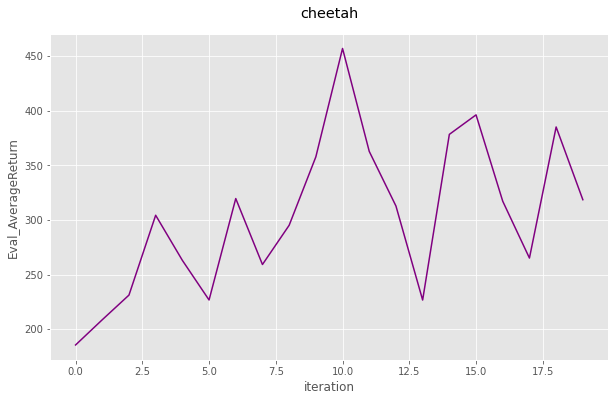

In [25]:
plt.rcParams["figure.figsize"] = (10,6)
plt.style.use('ggplot')

fig, ax = plt.subplots()
x = np.arange(20)
y = [185.4970703125, 208.59268188476562,231.165771484375,304.27923583984375,262.9873046875,
     226.70407104492188,319.5762939453125,259.1676025390625,295.0959777832031,357.7742004394531,
     457.0083923339844,362.7510986328125,312.7357482910156,226.64988708496094,378.3436584472656,
     396.2027587890625,317.12481689453125,265.0849609375,385.1184997558594,318.5137939453125]

plt.plot(x,y,color='purple')
plt.title("cheetah",y=1.03)
ax.set_xlabel("iteration")
ax.set_ylabel("Eval_AverageReturn")

ه)

In [27]:
!python /content/cs285_f2021/homework_fall2021/hw4/run_hw4_mb.py --exp_name q4_reacher_horizon5 --env_name reacher-cs285-v0 --add_sl_noise --mpc_horizon 5 --num_agent_train_steps_per_iter 1000 --batch_size 800 --n_iter 15 --video_log_freq -1




LOGGING TO:  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q4_reacher_horizon5_reacher-cs285-v0_16-05-2022_07-22-44 



########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q4_reacher_horizon5_reacher-cs285-v0_16-05-2022_07-22-44
########################
Using GPU id 0
Using action sampling strategy: random


********** Iteration 0 ************


Training agent...

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -464.7086486816406
Eval_StdReturn : 58.414764404296875
Eval_MaxReturn : -406.29388427734375
Eval_MinReturn : -523.1234130859375
Eval_AverageEpLen : 200.0
Train_AverageReturn : -1828.28662109375
Train_StdReturn : 414.68505859375
Train_MaxReturn : -865.3616943359375
Train_MinReturn : -2567.361083984375
Train_AverageEpLen : 200.0
Train_EnvstepsSoFar : 20000
TimeSinceStart : 15.143205404281616
Training Loss : 0.19628901779651

In [28]:
!python /content/cs285_f2021/homework_fall2021/hw4/run_hw4_mb.py --exp_name q4_reacher_horizon30 --env_name reacher-cs285-v0 --add_sl_noise --mpc_horizon 30 --num_agent_train_steps_per_iter 1000 --batch_size 800 --n_iter 15 --video_log_freq -1




LOGGING TO:  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q4_reacher_horizon30_reacher-cs285-v0_16-05-2022_07-30-44 



########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q4_reacher_horizon30_reacher-cs285-v0_16-05-2022_07-30-44
########################
Using GPU id 0
Using action sampling strategy: random


********** Iteration 0 ************


Training agent...

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -374.41552734375
Eval_StdReturn : 15.134262084960938
Eval_MaxReturn : -359.28125
Eval_MinReturn : -389.5497741699219
Eval_AverageEpLen : 200.0
Train_AverageReturn : -1828.28662109375
Train_StdReturn : 414.68505859375
Train_MaxReturn : -865.3616943359375
Train_MinReturn : -2567.361083984375
Train_AverageEpLen : 200.0
Train_EnvstepsSoFar : 20000
TimeSinceStart : 45.94045448303223
Training Loss : 0.19628901779651642
Initia

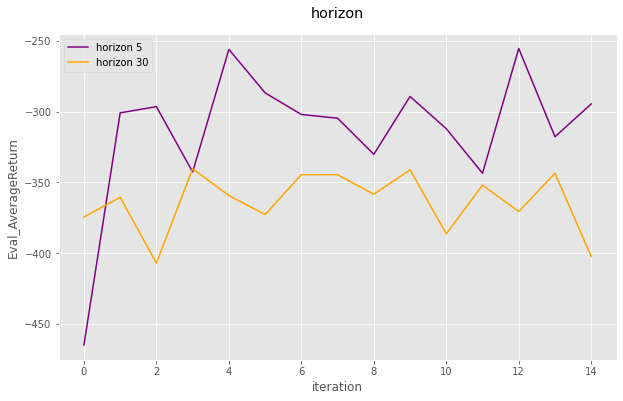

In [34]:
plt.rcParams["figure.figsize"] = (10,6)
plt.style.use('ggplot')

fig, ax = plt.subplots()
x = np.arange(15)
y_h5 = [-464.7086486816406,-300.86474609375,-296.47430419921875,-342.61895751953125,-256.06146240234375,
     -286.75567626953125,-302.0068359375,-304.6344299316406,-330.11614990234375,-289.2890319824219,
     -312.045654296875,-343.51031494140625,-255.41445922851562,-317.7342834472656,-294.5731506347656]
y_h30 = [-374.41552734375,-360.44940185546875,-406.91363525390625,-340.31976318359375,-359.20947265625,
         -372.6512145996094,-344.51531982421875,-344.52850341796875,-358.3243713378906,-341.146728515625,
         -386.23016357421875,-351.9158935546875,-370.5273132324219,-343.53216552734375,-402.2615966796875]
plt.plot(x,y_h5,color='purple')
plt.plot(x,y_h30,color='orange')
plt.title("horizon",y=1.03)
ax.set_xlabel("iteration")
ax.set_ylabel("Eval_AverageReturn")
plt.legend(['horizon 5','horizon 30'])

In [29]:
!python /content/cs285_f2021/homework_fall2021/hw4/run_hw4_mb.py --exp_name q4_reacher_ensemble1 --env_name reacher-cs285-v0 --ensemble_size 1 --add_sl_noise --mpc_horizon 10 --num_agent_train_steps_per_iter 1000 --batch_size 800 --n_iter 15 --video_log_freq -1




LOGGING TO:  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q4_reacher_ensemble1_reacher-cs285-v0_16-05-2022_07-58-53 



########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q4_reacher_ensemble1_reacher-cs285-v0_16-05-2022_07-58-53
########################
Using GPU id 0
Using action sampling strategy: random


********** Iteration 0 ************


Training agent...

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -444.48858642578125
Eval_StdReturn : 1.715087890625
Eval_MaxReturn : -442.77349853515625
Eval_MinReturn : -446.20367431640625
Eval_AverageEpLen : 200.0
Train_AverageReturn : -1828.28662109375
Train_StdReturn : 414.68505859375
Train_MaxReturn : -865.3616943359375
Train_MinReturn : -2567.361083984375
Train_AverageEpLen : 200.0
Train_EnvstepsSoFar : 20000
TimeSinceStart : 10.023076057434082
Training Loss : 0.19410943984985

In [30]:
!python /content/cs285_f2021/homework_fall2021/hw4/run_hw4_mb.py --exp_name q4_reacher_ensemble5 --env_name reacher-cs285-v0 --ensemble_size 5 --add_sl_noise --mpc_horizon 10 --num_agent_train_steps_per_iter 1000 --batch_size 800 --n_iter 15 --video_log_freq -1




LOGGING TO:  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q4_reacher_ensemble5_reacher-cs285-v0_16-05-2022_08-04-17 



########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/homework_fall2021/hw4/../../data/hw4_q4_reacher_ensemble5_reacher-cs285-v0_16-05-2022_08-04-17
########################
Using GPU id 0
Using action sampling strategy: random


********** Iteration 0 ************


Training agent...

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -393.7645568847656
Eval_StdReturn : 9.467742919921875
Eval_MaxReturn : -384.29681396484375
Eval_MinReturn : -403.2322998046875
Eval_AverageEpLen : 200.0
Train_AverageReturn : -1828.28662109375
Train_StdReturn : 414.68505859375
Train_MaxReturn : -865.3616943359375
Train_MinReturn : -2567.361083984375
Train_AverageEpLen : 200.0
Train_EnvstepsSoFar : 20000
TimeSinceStart : 31.48762583732605
Training Loss : 0.19506986439228

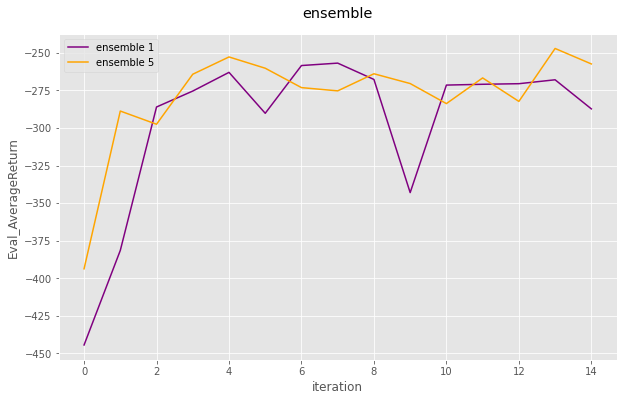

In [36]:
plt.rcParams["figure.figsize"] = (10,6)
plt.style.use('ggplot')

fig, ax = plt.subplots()
x = np.arange(15)
y_ens1 = [-444.48858642578125,-381.5205078125,-285.9897766113281,-275.369140625,-262.91754150390625,
          -290.18365478515625,-258.37786865234375,-256.76861572265625,-267.644287109375,-343.002197265625,
          -271.39599609375,-270.8581848144531,-270.47247314453125,-267.8671569824219,-287.240478515625]
y_ens5 = [-393.7645568847656,-288.69195556640625,-297.47125244140625,-264.16705322265625,-252.65525817871094,
          -260.16455078125,-273.081787109375,-275.24609375,-263.8590393066406,-270.367431640625,-283.7297058105469,
          -266.62548828125,-282.26324462890625,-247.00682067871094,-257.3115234375]
plt.plot(x,y_ens1,color='purple')
plt.plot(x,y_ens5,color='orange')
plt.title("ensemble",y=1.03)
ax.set_xlabel("iteration")
ax.set_ylabel("Eval_AverageReturn")
plt.legend(['ensemble 1','ensemble 5'])